In [1]:
import pandas as pd
import numpy as np

In [2]:
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

student_number = list(range(1, len(students) + 1))
shoe_sizes = np.random.choice(np.arange(6, 14, 0.5), len(students))
side_of_classroom = np.random.choice(['left', 'right'], len(students))
favorite_number = np.random.randint(1, 11, len(students))

In [4]:
students = pd.DataFrame({'student_name': students,
                         'student_number': student_number,
                         'show_size': shoe_sizes,
                         'favorite_number': favorite_number})

In [5]:
students

,student_name,student_number,show_size,favorite_number
0,Sally,1,12.5,4
1,Jane,2,10.0,4
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
4,Ada,5,12.5,4
5,John,6,9.0,5
6,Thomas,7,12.5,4
7,Marie,8,7.5,3
8,Albert,9,6.0,4
9,Richard,10,7.0,10


Print out the shape of the data frame.

Print out the names of the columns in the data frame.

Rename 2 of the columns in your data frame.

Create a new data frame based on the one you have. The new data frame should only have columns for shoe size and side of the classroom.

Create a new data frame that has all of the columns, but only 5 rows.

Create a new data frame that has only columns for favorite number and name, and only includes 7 rows.

Create a new column for the ratio of shoe size to the favorite number. Name this ss_to_fn

Create a new column that contains the z-score for the shoe size.

Transform the side_of_the_classroom columns such that the values are either R or L.

Find the names of all the students that have a shoe size greater than the 3rd quartile of shoe sizes (You can use the .quantile method on a series for this)

Find the names of all the students that have a shoe size less than the 1st quartile of shoe sizes

In [6]:
students.shape

(12, 4)

In [8]:
students.columns

Index(['student_name', 'student_number', 'show_size', 'favorite_number'], dtype='object')

In [10]:
students.rename(index=str, columns={'student_name': 'student', 'show_size': 'shoe_size', 'student_number': 'student_no'})

,student,student_no,shoe_size,favorite_number
0,Sally,1,12.5,4
1,Jane,2,10.0,4
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
4,Ada,5,12.5,4
5,John,6,9.0,5
6,Thomas,7,12.5,4
7,Marie,8,7.5,3
8,Albert,9,6.0,4
9,Richard,10,7.0,10


In [12]:
students

,student_name,student_number,show_size,favorite_number
0,Sally,1,12.5,4
1,Jane,2,10.0,4
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
4,Ada,5,12.5,4
5,John,6,9.0,5
6,Thomas,7,12.5,4
7,Marie,8,7.5,3
8,Albert,9,6.0,4
9,Richard,10,7.0,10


In [13]:
students.columns = ('student', 'student_no', 'shoe_size', 'fav_number')

In [14]:
students

,student,student_no,shoe_size,fav_number
0,Sally,1,12.5,4
1,Jane,2,10.0,4
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
4,Ada,5,12.5,4
5,John,6,9.0,5
6,Thomas,7,12.5,4
7,Marie,8,7.5,3
8,Albert,9,6.0,4
9,Richard,10,7.0,10


In [16]:
size_side = pd.DataFrame({'shoe_size': shoe_sizes,
                          'side_of_classroom': side_of_classroom})

In [17]:
size_side

,shoe_size,side_of_classroom
0,12.5,left
1,10.0,left
2,8.0,right
3,8.5,right
4,12.5,left
5,9.0,left
6,12.5,right
7,7.5,left
8,6.0,left
9,7.0,left


In [18]:
students.head()

,student,student_no,shoe_size,fav_number
0,Sally,1,12.5,4
1,Jane,2,10.0,4
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
4,Ada,5,12.5,4


In [30]:
students[['student', 'fav_number']].head(7)

,student,fav_number
0,Sally,4
1,Jane,4
2,Suzie,8
3,Billy,6
4,Ada,4
5,John,5
6,Thomas,4


In [31]:
size_side

,shoe_size,side_of_classroom
0,12.5,left
1,10.0,left
2,8.0,right
3,8.5,right
4,12.5,left
5,9.0,left
6,12.5,right
7,7.5,left
8,6.0,left
9,7.0,left


In [33]:
z_score = (size_side.shoe_size - size_side.shoe_size.mean()) / size_side.shoe_size.std()
size_side['ss_to_fn'] = z_score

In [34]:
size_side

,shoe_size,side_of_classroom,ss_to_fn
0,12.5,left,0.901880
1,10.0,left,-0.015286
2,8.0,right,-0.749019
3,8.5,right,-0.565586
4,12.5,left,0.901880
5,9.0,left,-0.382152
6,12.5,right,0.901880
7,7.5,left,-0.932452
8,6.0,left,-1.482751
9,7.0,left,-1.115885


In [38]:
size_side.side_of_classroom.str.replace('left', 'L').replace('right', 'R')

0     L
1     L
2     R
3     R
4     L
5     L
6     R
7     L
8     L
9     L
10    L
11    L
Name: side_of_classroom, dtype: object

In [41]:
replacements = ({'left': 'L',
                 'right': 'R'})
size_side.replace(replacements, inplace=True)

In [42]:
size_side

,shoe_size,side_of_classroom,ss_to_fn
0,12.5,L,0.901880
1,10.0,L,-0.015286
2,8.0,R,-0.749019
3,8.5,R,-0.565586
4,12.5,L,0.901880
5,9.0,L,-0.382152
6,12.5,R,0.901880
7,7.5,L,-0.932452
8,6.0,L,-1.482751
9,7.0,L,-1.115885


In [43]:
students[['student', 'shoe_size'[students.shoe_size > shoe_size.quantile(3)]]]

NameError: name 'shoe_size' is not defined

In [51]:
students[students.shoe_size > students.shoe_size.quantile(.75)]

,student,student_no,shoe_size,fav_number
10,Isaac,11,13.5,6
11,Alan,12,13.5,8


In [50]:
students[students.shoe_size < students.shoe_size.quantile(.25)]

,student,student_no,shoe_size,fav_number
7,Marie,8,7.5,3
8,Albert,9,6.0,4
9,Richard,10,7.0,10


In [55]:
s_mean = students[['shoe_size', 'fav_number']].mean()

In [56]:
s_min = students[['shoe_size', 'fav_number']].min()

In [57]:
s_median = students[['shoe_size', 'fav_number']].median()

In [58]:
s_max = students[['shoe_size', 'fav_number']].max()

In [63]:
students.groupby('fav_number')

In [64]:
students.sor

,student,student_no,shoe_size,fav_number
8,Albert,9,6.0,4
9,Richard,10,7.0,10
7,Marie,8,7.5,3
2,Suzie,3,8.0,8
3,Billy,4,8.5,6
5,John,6,9.0,5
1,Jane,2,10.0,4
0,Sally,1,12.5,4
4,Ada,5,12.5,4
6,Thomas,7,12.5,4


In [67]:
students.sort_values(by='student').sort_values(by='fav_number')

,student,student_no,shoe_size,fav_number
7,Marie,8,7.5,3
4,Ada,5,12.5,4
8,Albert,9,6.0,4
1,Jane,2,10.0,4
0,Sally,1,12.5,4
6,Thomas,7,12.5,4
5,John,6,9.0,5
3,Billy,4,8.5,6
10,Isaac,11,13.5,6
11,Alan,12,13.5,8


In [70]:
side_r = size_side[['side_of_classroom']]

In [71]:
students['side'] = side_r

In [72]:
students

,student,student_no,shoe_size,fav_number,side
0,Sally,1,12.5,4,L
1,Jane,2,10.0,4,L
2,Suzie,3,8.0,8,R
3,Billy,4,8.5,6,R
4,Ada,5,12.5,4,L
5,John,6,9.0,5,L
6,Thomas,7,12.5,4,R
7,Marie,8,7.5,3,L
8,Albert,9,6.0,4,L
9,Richard,10,7.0,10,L


In [84]:
students[['side', 'shoe_size']].groupby('side').agg(['mean'])

,shoe_size
,mean
side,
L,10.166667
R,9.666667


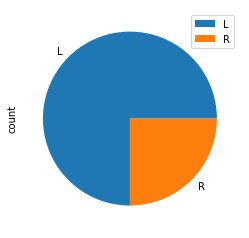

In [153]:
side_count = students[['side', 'fav_number']].groupby('side').count().rename(columns={'fav_number': 'count'})
side_count.plot.pie(y='count')

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
students

,student,student_no,shoe_size,fav_number,side
0,Sally,1,12.5,4,L
1,Jane,2,10.0,4,L
2,Suzie,3,8.0,8,R
3,Billy,4,8.5,6,R
4,Ada,5,12.5,4,L
5,John,6,9.0,5,L
6,Thomas,7,12.5,4,R
7,Marie,8,7.5,3,L
8,Albert,9,6.0,4,L
9,Richard,10,7.0,10,L


In [137]:
side_count

,fav_number
,max
side,
L,10
R,8


In [155]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

from env import user, host, pw

In [156]:
import pandas as pd
conn = get_connection('ada_students', user, host, pw)

ValueError: invalid literal for int() with base 10: ''